<a href="https://colab.research.google.com/github/livialins/DataScience/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Panorama do COVID-19 no Brasil
COVID-19 é uma doença infecciosa causada por recém-descoberto coronavírus.

<center><img alt="Colaboratory logo" width="50%" src="https://greatermncities.org/wp-content/uploads/2020/04/COVID-19-graphic.jpg"></center>

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

In [2]:
# importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib as plot

In [7]:
# importando o dataset COVID-19 para um DataFrame
df = pd.read_csv('/content/owid-covid-data.csv')



In [11]:
df.shape

(330832, 67)

In [12]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [13]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [14]:
df.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
population                                 float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

In [15]:
#Identificando a porcentagem de valores ausentes das colunas
df.isnull().sum() / df.shape[0]
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                      0.970063
weekly_icu_admissions_per_million          0.970063
excess_mortality_cumulative_per_million    0.965133
excess_mortality                           0.965133
excess_mortality_cumulative                0.965133
                                             ...   
new_deaths_per_million                     0.027597
population                                 0.000000
date                                       0.000000
location                                   0.000000
iso_code                                   0.000000
Length: 67, dtype: float64

In [16]:
df.date = pd.to_datetime(df.date)

In [19]:
df.loc[df.date == '2023-01-12'].sort_values(by="total_cases", ascending=False)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
326700,OWID_WRL,NaN,World,2023-01-12,746056759.0,640489.0,1035438.857,6784408.0,3464.0,5208.429,...,34.635,60.13,2.705,72.58,0.737,7.975105e+09,NaN,NaN,NaN,NaN
126640,OWID_HIC,NaN,High income,2023-01-12,407611722.0,272501.0,384611.000,2787050.0,893.0,1676.286,...,NaN,NaN,NaN,NaN,NaN,1.250515e+09,NaN,NaN,NaN,NaN
16812,OWID_ASI,NaN,Asia,2023-01-12,288880546.0,556638.0,835680.857,1583533.0,2935.0,3708.143,...,NaN,NaN,NaN,NaN,NaN,4.721383e+09,NaN,NaN,NaN,NaN
92618,OWID_EUR,NaN,Europe,2023-01-12,243368199.0,27989.0,69666.000,2021153.0,399.0,762.429,...,NaN,NaN,NaN,NaN,NaN,7.448078e+08,NaN,NaN,NaN,NaN
315028,OWID_UMC,NaN,Upper middle income,2023-01-12,238482725.0,364335.0,645951.571,2614459.0,2554.0,3489.857,...,NaN,NaN,NaN,NaN,NaN,2.525921e+09,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217013,OWID_NIR,Europe,Northern Ireland,2023-01-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.896000e+06,NaN,NaN,NaN,NaN
260118,OWID_SCT,Europe,Scotland,2023-01-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.466000e+06,NaN,NaN,NaN,NaN
288885,TWN,Asia,Taiwan,2023-01-12,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.46,NaN,2.389340e+07,NaN,NaN,NaN,NaN
303256,TKM,Asia,Turkmenistan,2023-01-12,NaN,0.0,0.000,NaN,0.0,0.000,...,NaN,100.00,7.400,68.19,0.715,6.430777e+06,NaN,NaN,NaN,NaN


In [21]:
df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by="total_deaths", ascending=False)[1:6]


,location,total_deaths
125698,High income,310480.0
91676,Europe,187523.0
211518,North America,155909.0
314086,Upper middle income,128961.0
92989,European Union,122231.0


<Axes: >

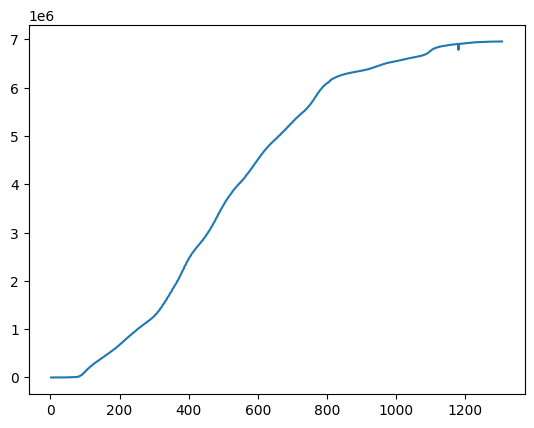

In [26]:
df.loc[df.location == "World", "total_deaths"].reset_index(drop=True).plot()